In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# data

In [39]:
import catboost as cat

In [40]:
import data
import config

In [41]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [42]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types= ['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [43]:
traintest.num_dataset()

5

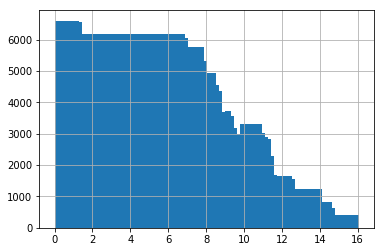

In [44]:
traintest.ydf.hist(bins=100);

In [45]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [46]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 282)

In [47]:
datadf=traintest.traindf
datadf.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_03_0200_105000  0.146316  0.267394  0.117802 -0.157496  0.061104   
quake_06_0120_099000  0.148596  0.267133  0.130696 -0.214939  0.099131   
quake_07_0296_013500  0.177460  0.230688  0.130831 -0.158412  0.087166   
quake_03_0090_034500  0.204399  0.217211  0.080866 -0.092751  0.087826   
quake_08_0137_055500  0.192906  0.242893  0.097641 -0.097974  0.083360   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  \
index                                                                    
quake_03_0200_105000 -0.047981  0.023396  0.213477  0.177386 -0.101902   
quake_06_0120_099000 -0.010598  0.015269  0.249279  0.170874 -0.169247   
quake_07_0296_013500 -0.039375 -0.019466  0.233472  0.170282 -0.139383   
quake_03_0090_034500 -0.115556 -0.022419  0.137570  0.176601 -0.000350   
quake_08_0137_055500 -0.108193 -0.032382  0.158772  0.151101  0.020051   

                           ...         fwvextdis_pca10_2  fwvextdis_pca10_3  \
index                      ...                                                
quake_03_0200_105000       ...                 -0.867152           0.251729   
quake_06_0120_099000       ...                  0.599042          -0.058171   
quake_07_0296_013500       ...                  0.276776          -0.041059   
quake_03_0090_034500       ...                 -1.211162           0.021516   
quake_08_0137_055500       ...                 -1.418130          -0.099060   

                      fwvextdis_pca10_4  fwvextdis_pca10_5  fwvextdis_pca10_6  \
index                                                                           
quake_03_0200_105000           0.083587           0.029462          -0.022975   
quake_06_0120_099000          -0.059255           0.019930           0.002073   
quake_07_0296_013500           0.105883           0.042710          -0.009792   
quake_03_0090_034500          -0.055162           0.053457          -0.030760   
quake_08_0137_055500          -0.037935          -0.052247           0.054380   

                      fwvextdis_pca10_7  fwvextdis_pca10_8  fwvextdis_pca10_9  \
index                                                                           
quake_03_0200_105000          -0.039655           0.000274           0.028007   
quake_06_0120_099000           0.007824          -0.008991           0.020008   
quake_07_0296_013500          -0.018473           0.035101          -0.005669   
quake_03_0090_034500          -0.066036           0.022193           0.016614   
quake_08_0137_055500          -0.019536           0.042780           0.010705   

                      fwv_wholereg  fwvext_wholereg  
index                                                
quake_03_0200_105000     93.940635        -6.822180  
quake_06_0120_099000     20.000997       -12.672698  
quake_07_0296_013500     37.947210       -38.633617  
quake_03_0090_034500     80.679887        11.746026  
quake_08_0137_055500     53.077711         4.727631  

[5 rows x 282 columns]

In [48]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [49]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [50]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [51]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 282))

In [52]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [53]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [54]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 282))

In [55]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [56]:
if 0:
    for qno in quakes:
        r=11/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r

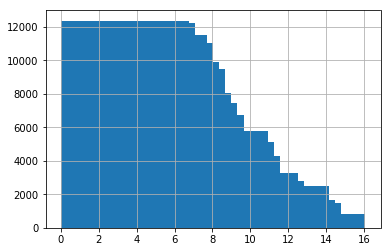

In [57]:
ydf.hist(bins=50);

In [58]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [59]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [60]:
GNO=112
!mkdir -p input/sub/{GNO}

In [61]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/112'

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
data=datadf.copy()
columns=["f"+str(i) for i in range(data.shape[1])]
data.columns=columns
data['y']=ydf
data.head()

f0        f1        f2        f3        f4  \
index                                                                    
quake_03_0200_105000  0.146316  0.267394  0.117802 -0.157496  0.061104   
quake_06_0120_099000  0.148596  0.267133  0.130696 -0.214939  0.099131   
quake_07_0296_013500  0.177460  0.230688  0.130831 -0.158412  0.087166   
quake_03_0090_034500  0.204399  0.217211  0.080866 -0.092751  0.087826   
quake_08_0137_055500  0.192906  0.242893  0.097641 -0.097974  0.083360   

                            f5        f6        f7        f8        f9  \
index                                                                    
quake_03_0200_105000 -0.047981  0.023396  0.213477  0.177386 -0.101902   
quake_06_0120_099000 -0.010598  0.015269  0.249279  0.170874 -0.169247   
quake_07_0296_013500 -0.039375 -0.019466  0.233472  0.170282 -0.139383   
quake_03_0090_034500 -0.115556 -0.022419  0.137570  0.176601 -0.000350   
quake_08_0137_055500 -0.108193 -0.032382  0.158772  0.151101  0.020051   

                        ...         f273      f274      f275      f276  \
index                   ...                                              
quake_03_0200_105000    ...     0.251729  0.083587  0.029462 -0.022975   
quake_06_0120_099000    ...    -0.058171 -0.059255  0.019930  0.002073   
quake_07_0296_013500    ...    -0.041059  0.105883  0.042710 -0.009792   
quake_03_0090_034500    ...     0.021516 -0.055162  0.053457 -0.030760   
quake_08_0137_055500    ...    -0.099060 -0.037935 -0.052247  0.054380   

                          f277      f278      f279       f280       f281  \
index                                                                      
quake_03_0200_105000 -0.039655  0.000274  0.028007  93.940635  -6.822180   
quake_06_0120_099000  0.007824 -0.008991  0.020008  20.000997 -12.672698   
quake_07_0296_013500 -0.018473  0.035101 -0.005669  37.947210 -38.633617   
quake_03_0090_034500 -0.066036  0.022193  0.016614  80.679887  11.746026   
quake_08_0137_055500 -0.019536  0.042780  0.010705  53.077711   4.727631   

                             y  
index                           
quake_03_0200_105000  0.998098  
quake_06_0120_099000  2.318898  
quake_07_0296_013500  4.532197  
quake_03_0090_034500  5.302996  
quake_08_0137_055500  2.514399  

[5 rows x 283 columns]

In [73]:
data.columns[data.isnull().sum()>0]

Index([], dtype='object')

In [75]:
datadf.shape

(409394, 282)

In [89]:
for i in range(282):
    for j in range(i+1,282):
        a=datadf.iloc[:,i].values
        b=datadf.iloc[:,j].values
        c=np.corrcoef(a,b)[0,1]
        if np.abs(c)>0.95:
            print i,j, c
    print i
    

0
1
2
3
4
5
6
7 9 -0.9578030459960882
7 126 0.9574926723672555
7 210 0.955980444552812
7
8
9 36 0.951812943068084
9 210 -0.9719295356008473
9
10
11
12 77 0.9623435018081321
12 87 -0.9527611581001829
12 241 -0.962407971260201
12
13
14 38 -0.9535416046097666
14 54 -0.9791187714535805
14 56 0.9501985130657291
14 88 -0.9594049490302129
14 99 0.9647219538442515
14 125 0.9735547186806341
14 197 -0.9512490872915558
14 200 -0.9617725663254483
14
15
16
17
18
19 201 -0.9568972675110243
19
20
21
22
23 62 -0.9543512687144842
23 94 -0.951175223089369
23 193 0.9639499640166704
23 211 -0.9626560326015533
23
24 126 -0.9545203428211138
24
25
26
27
28
29
30 201 0.950070602936597
30
31
32
33 211 -0.9509088672373447
33
34
35
36 80 -0.9588762875614213
36 210 -0.9783116212586943
36 251 -0.9654906703523379
36
37 172 0.9581253080124427
37
38
39 77 0.95168361756537
39
40
41
42
43
44
45
46
47
48
49 99 0.9561496402898816
49 139 0.9519992157104334
49 150 0.9624596171562195
49 200 -0.9717781417018125
49
50
51
52
5

In [121]:
fm='y ~ '+" + ".join([u for i,u in enumerate(columns[:200])])

In [122]:
fm

'y ~ f0 + f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9 + f10 + f11 + f12 + f13 + f14 + f15 + f16 + f17 + f18 + f19 + f20 + f21 + f22 + f23 + f24 + f25 + f26 + f27 + f28 + f29 + f30 + f31 + f32 + f33 + f34 + f35 + f36 + f37 + f38 + f39 + f40 + f41 + f42 + f43 + f44 + f45 + f46 + f47 + f48 + f49 + f50 + f51 + f52 + f53 + f54 + f55 + f56 + f57 + f58 + f59 + f60 + f61 + f62 + f63 + f64 + f65 + f66 + f67 + f68 + f69 + f70 + f71 + f72 + f73 + f74 + f75 + f76 + f77 + f78 + f79 + f80 + f81 + f82 + f83 + f84 + f85 + f86 + f87 + f88 + f89 + f90 + f91 + f92 + f93 + f94 + f95 + f96 + f97 + f98 + f99 + f100 + f101 + f102 + f103 + f104 + f105 + f106 + f107 + f108 + f109 + f110 + f111 + f112 + f113 + f114 + f115 + f116 + f117 + f118 + f119 + f120 + f121 + f122 + f123 + f124 + f125 + f126 + f127 + f128 + f129 + f130 + f131 + f132 + f133 + f134 + f135 + f136 + f137 + f138 + f139 + f140 + f141 + f142 + f143 + f144 + f145 + f146 + f147 + f148 + f149 + f150 + f151 + f152 + f153 + f154 + f155 + f156 + f157 +

In [123]:
mod = smf.quantreg(fm, data[:10000])


In [124]:
res = mod.fit()
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3426
Model:                       QuantReg   Bandwidth:                      0.5249
Method:                 Least Squares   Sparsity:                        4.850
Date:                Sat, 25 May 2019   No. Observations:                10000
Time:                        05:46:45   Df Residuals:                     9799
                                        Df Model:                          200
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4356      9.807      4.225      0.000      22.211      60.660
f0           -10.4927      3.456     -3.036      0.002     -17.268      -3.718
f1             0.7693      3.369      0.228      0.819      -5.834       7.372
f2            -4.2757      3.147     -1.359      0.1

/home/hadoop/miniconda2/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [131]:
ypred=res.predict(data.iloc[:,:200])
np.mean(np.abs(Y-ypred))

2.0022735617765166

In [132]:
from sklearn.metrics import r2_score

In [134]:
np.sqrt(r2_score(Y,ypred))

0.6797851344915486

In [135]:
config.quake_length

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [136]:
tmpdict = {}
a=0
for i in range(1,16):
    tmpdict[i]=a+config.quake_length[i]
    a=tmpdict[i]
tmpdict

{1: 11.540566395569977,
 2: 25.72076999478228,
 3: 34.57701340322952,
 4: 47.27089162767743,
 5: 55.325987691874275,
 6: 62.38523520128648,
 7: 78.49223550655667,
 8: 86.3983798249896,
 9: 96.03555595765623,
 10: 107.46228066182093,
 11: 118.48683539267182,
 12: 127.31541659379985,
 13: 135.8812043577587,
 14: 150.6327440363285,
 15: 160.09224201511958}

In [137]:
tmpdf=qdf.copy()

In [138]:
tmpdf['y']=ydf

In [139]:
tmpdf['qlen']=tmpdf['index'].map(lambda u: tmpdict[u])
tmpdf['time_to_begin'] =tmpdf['qlen']-tmpdf["y"]

In [140]:
plt.rcParams['figure.figsize'] = (12, 8)


In [141]:
def ff(x,y):
    idx=np.argsort(x)
    return x[idx],y[idx]

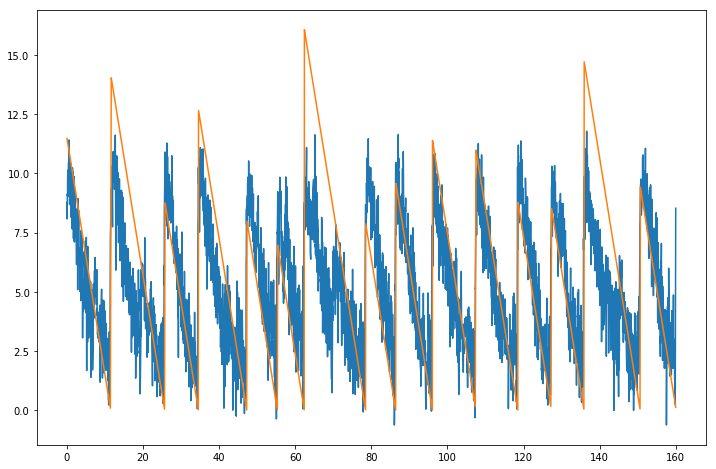

In [142]:
N=5000
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,ypred[:N]) )
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,Y[:N]) )


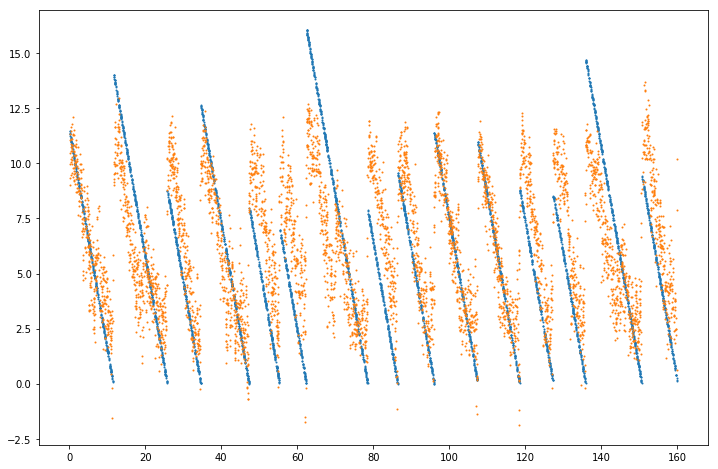

In [87]:
N=5000
plt.scatter(tmpdf['time_to_begin'][:N].values,Y[:N],s=1)
plt.scatter(tmpdf['time_to_begin'][:N].values,ypred[:N],s=1)

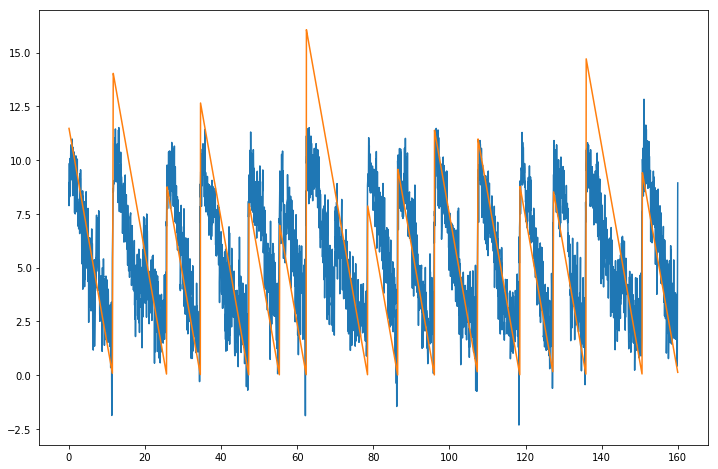

In [82]:
N=5000
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,ypred[:N]) )
plt.plot( *ff(tmpdf['time_to_begin'][:N].values,Y[:N]) )


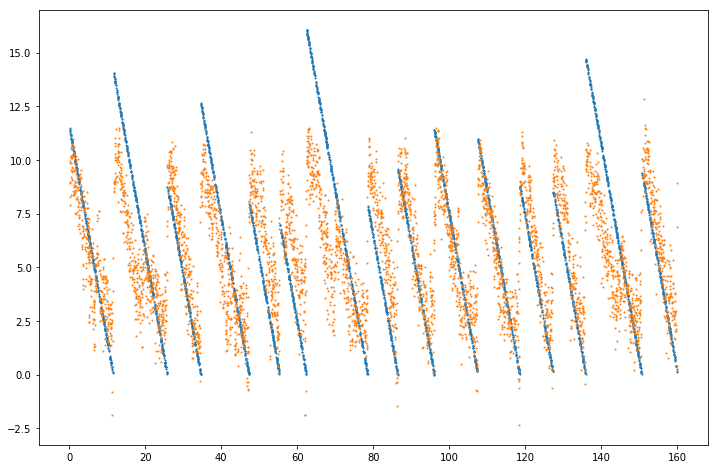

In [78]:
N=5000
plt.scatter(tmpdf['time_to_begin'][:N].values,Y[:N],s=1)
plt.scatter(tmpdf['time_to_begin'][:N].values,ypred[:N],s=1)

In [30]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [31]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)
    make_sub(model,qno)
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [32]:
params = {'objective':"RMSE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [33]:
best_mae=1e10

In [34]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel, random_seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [35]:
best={'border_count': 43.48353701986266,
 'colsample_bylevel': 0.7883483108536691,
 'l2_leaf_reg': 0.5928186050324619,
 'learning_rate': 0.005527761648103233,
 'max_depth': 9.37492102038154}

In [36]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['random_seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 1303481
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


0:	learn: 5.4501457	test: 5.4517036	best: 5.4517036 (0)	total: 150ms	remaining: 12m 32s
100:	learn: 3.3141501	test: 3.2878568	best: 3.2878568 (100)	total: 9.53s	remaining: 7m 42s
200:	learn: 2.1922832	test: 2.2173582	best: 2.2173582 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.6026765	test: 1.7399995	best: 1.7399995 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3130767	test: 1.4874408	best: 1.4874408 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.1711254	test: 1.3454115	best: 1.3454115 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.0982239	test: 1.2652242	best: 1.2652242 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0569604	test: 1.2219316	best: 1.2219316 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0303133	test: 1.1975602	best: 1.1975602 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0102898	test: 1.1834218	best: 1.1834218 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.9931405	test: 1.1765542	best: 1.1765542 (1000)	total: 1m 28s	remaining: 5m 54s
11

0:	learn: 5.4497923	test: 5.4576843	best: 5.4576843 (0)	total: 95.3ms	remaining: 7m 56s
100:	learn: 3.3101150	test: 3.4777333	best: 3.4777333 (100)	total: 9.15s	remaining: 7m 23s
200:	learn: 2.1879030	test: 2.4295366	best: 2.4295366 (200)	total: 18.1s	remaining: 7m 13s
300:	learn: 1.5979457	test: 1.9168265	best: 1.9168265 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 1.3060395	test: 1.6654653	best: 1.6654653 (400)	total: 36s	remaining: 6m 52s
500:	learn: 1.1622884	test: 1.5311882	best: 1.5311882 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.0885032	test: 1.4560770	best: 1.4560770 (600)	total: 53.1s	remaining: 6m 28s
700:	learn: 1.0463461	test: 1.4141730	best: 1.4141730 (700)	total: 1m 1s	remaining: 6m 19s
800:	learn: 1.0193460	test: 1.3911195	best: 1.3911195 (800)	total: 1m 10s	remaining: 6m 8s
900:	learn: 0.9989442	test: 1.3792729	best: 1.3792729 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 0.9812548	test: 1.3739949	best: 1.3739949 (1000)	total: 1m 27s	remaining: 5m 48s
1

0:	learn: 5.4504736	test: 5.4450979	best: 5.4450979 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.3141273	test: 3.2316222	best: 3.2316222 (100)	total: 9.34s	remaining: 7m 33s
200:	learn: 2.1964895	test: 2.0266268	best: 2.0266268 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6179447	test: 1.3676353	best: 1.3676353 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3345709	test: 1.0240720	best: 1.0240720 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.1951816	test: 0.8739915	best: 0.8739915 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1224027	test: 0.8229980	best: 0.8229980 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.0805646	test: 0.8140294	best: 0.8138925 (698)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0526986	test: 0.8153509	best: 0.8135367 (724)	total: 1m 11s	remaining: 6m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8135367437
bestIteration = 724

Shrink model to first 725 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/su

0:	learn: 5.4500030	test: 5.4558176	best: 5.4558176 (0)	total: 99.5ms	remaining: 8m 17s
100:	learn: 3.3102176	test: 3.4726577	best: 3.4726577 (100)	total: 9.3s	remaining: 7m 31s
200:	learn: 2.1871360	test: 2.4235069	best: 2.4235069 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6030753	test: 1.8594993	best: 1.8594993 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.3154094	test: 1.5506121	best: 1.5506121 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1750241	test: 1.3796691	best: 1.3796691 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.1027862	test: 1.2864725	best: 1.2864725 (600)	total: 53.8s	remaining: 6m 33s
700:	learn: 1.0617103	test: 1.2354329	best: 1.2354329 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0347923	test: 1.2084181	best: 1.2084181 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0144760	test: 1.1924881	best: 1.1923236 (897)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 0.9971682	test: 1.1833994	best: 1.1833994 (1000)	total: 1m 28s	remaining: 5m 55s
11

0:	learn: 5.4505649	test: 5.4398607	best: 5.4398607 (0)	total: 102ms	remaining: 8m 29s
100:	learn: 3.3102710	test: 3.0035931	best: 3.0035931 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.1899692	test: 1.8069095	best: 1.8069095 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6072109	test: 1.2928322	best: 1.2928322 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3171862	test: 1.1701866	best: 1.1701866 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1743969	test: 1.1720826	best: 1.1616157 (448)	total: 45.7s	remaining: 6m 50s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.16161568
bestIteration = 448

Shrink model to first 449 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q5_a11_s1303481.csv
quake  5 (1.1616156800711508, 448)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)


0:	learn: 5.4507415	test: 5.4369682	best: 5.4369682 (0)	total: 98.6ms	remaining: 8m 12s
100:	learn: 3.3106893	test: 3.1948610	best: 3.1948610 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 2.1890642	test: 2.1027717	best: 2.1027717 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.6055900	test: 1.5748699	best: 1.5748699 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3191707	test: 1.3810594	best: 1.3810594 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1764414	test: 1.3382938	best: 1.3382938 (500)	total: 45.8s	remaining: 6m 50s
600:	learn: 1.1022894	test: 1.3318797	best: 1.3317483 (593)	total: 54.6s	remaining: 6m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.331748251
bestIteration = 593

Shrink model to first 594 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q6_a11_s1303481.csv
quake  6 (1.3317482513480166, 593)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)


0:	learn: 5.4494874	test: 5.4602702	best: 5.4602702 (0)	total: 99.2ms	remaining: 8m 16s
100:	learn: 3.3132514	test: 3.5173217	best: 3.5173217 (100)	total: 9.08s	remaining: 7m 20s
200:	learn: 2.1899571	test: 2.4776601	best: 2.4776601 (200)	total: 18.1s	remaining: 7m 11s
300:	learn: 1.6014125	test: 1.9418359	best: 1.9418359 (300)	total: 27s	remaining: 7m
400:	learn: 1.3077796	test: 1.6883501	best: 1.6883501 (400)	total: 35.6s	remaining: 6m 48s
500:	learn: 1.1612719	test: 1.5601966	best: 1.5601966 (500)	total: 44.2s	remaining: 6m 37s
600:	learn: 1.0844621	test: 1.4907812	best: 1.4907812 (600)	total: 52.9s	remaining: 6m 27s
700:	learn: 1.0402337	test: 1.4521948	best: 1.4521948 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.0116778	test: 1.4316505	best: 1.4316505 (800)	total: 1m 9s	remaining: 6m 6s
900:	learn: 0.9903471	test: 1.4210797	best: 1.4210797 (900)	total: 1m 18s	remaining: 5m 55s
1000:	learn: 0.9724304	test: 1.4132456	best: 1.4132456 (1000)	total: 1m 26s	remaining: 5m 45s
1100:

0:	learn: 5.4506707	test: 5.4366354	best: 5.4366354 (0)	total: 104ms	remaining: 8m 41s
100:	learn: 3.3129515	test: 2.8913113	best: 2.8913113 (100)	total: 9.58s	remaining: 7m 44s
200:	learn: 2.1912755	test: 1.6751436	best: 1.6751436 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.6065183	test: 1.1992758	best: 1.1992758 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.3172929	test: 1.1055122	best: 1.1055122 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.1742656	test: 1.1256583	best: 1.1034776 (416)	total: 46.2s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.103477638
bestIteration = 416

Shrink model to first 417 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q8_a11_s1303481.csv
quake  8 (1.1034776380630416, 416)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)


0:	learn: 5.4504175	test: 5.4471866	best: 5.4471866 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 3.3128307	test: 3.2811319	best: 3.2811319 (100)	total: 9.31s	remaining: 7m 31s
200:	learn: 2.1970870	test: 2.1295949	best: 2.1295949 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6187955	test: 1.4929336	best: 1.4929336 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.3364301	test: 1.1610270	best: 1.1610270 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.1957675	test: 1.0190626	best: 1.0190626 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1227790	test: 0.9686199	best: 0.9686199 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.0803788	test: 0.9496528	best: 0.9496528 (700)	total: 1m 4s	remaining: 6m 32s
800:	learn: 1.0523356	test: 0.9430652	best: 0.9430652 (800)	total: 1m 12s	remaining: 6m 21s
900:	learn: 1.0315697	test: 0.9398705	best: 0.9398346 (898)	total: 1m 21s	remaining: 6m 10s
1000:	learn: 1.0140372	test: 0.9370600	best: 0.9369271 (992)	total: 1m 29s	remaining: 5m 59s

0:	learn: 5.4501898	test: 5.4530650	best: 5.4530650 (0)	total: 96.5ms	remaining: 8m 2s
100:	learn: 3.3115611	test: 3.4063546	best: 3.4063546 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.1910719	test: 2.3343303	best: 2.3343303 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6083397	test: 1.7529516	best: 1.7529516 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.3227583	test: 1.4354246	best: 1.4354246 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.1830712	test: 1.2658531	best: 1.2658531 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1111237	test: 1.1742395	best: 1.1742395 (600)	total: 54s	remaining: 6m 34s
700:	learn: 1.0697522	test: 1.1273948	best: 1.1273948 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0428050	test: 1.1019340	best: 1.1019340 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0227429	test: 1.0880814	best: 1.0880814 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0059262	test: 1.0800277	best: 1.0800277 (1000)	total: 1m 28s	remaining: 5m 53s
11

0:	learn: 5.4502713	test: 5.4521630	best: 5.4521630 (0)	total: 97.9ms	remaining: 8m 9s
100:	learn: 3.3106415	test: 3.4361153	best: 3.4361153 (100)	total: 9.3s	remaining: 7m 31s
200:	learn: 2.1910846	test: 2.3662554	best: 2.3662554 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6090258	test: 1.7806787	best: 1.7806787 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.3226736	test: 1.4526806	best: 1.4526806 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1826976	test: 1.2713673	best: 1.2713673 (500)	total: 45.1s	remaining: 6m 45s
600:	learn: 1.1106467	test: 1.1718911	best: 1.1718911 (600)	total: 54.1s	remaining: 6m 36s
700:	learn: 1.0698180	test: 1.1191722	best: 1.1191722 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0427524	test: 1.0919541	best: 1.0919541 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0216910	test: 1.0777882	best: 1.0777882 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0039456	test: 1.0696223	best: 1.0696223 (1000)	total: 1m 28s	remaining: 5m 54s
1

0:	learn: 5.4505617	test: 5.4428236	best: 5.4428236 (0)	total: 97.3ms	remaining: 8m 6s
100:	learn: 3.3101487	test: 3.1556101	best: 3.1556101 (100)	total: 9.61s	remaining: 7m 46s
200:	learn: 2.1947067	test: 1.9138513	best: 1.9138513 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6168919	test: 1.2831862	best: 1.2831862 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3321760	test: 1.0035282	best: 1.0035282 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.1910515	test: 0.9073992	best: 0.9073992 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1176698	test: 0.8871640	best: 0.8871640 (600)	total: 54.8s	remaining: 6m 40s
700:	learn: 1.0750039	test: 0.8937854	best: 0.8868368 (610)	total: 1m 3s	remaining: 6m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8868367954
bestIteration = 610

Shrink model to first 611 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q12_a11_s1303481.csv
quake  12 (0.8868367954079965, 610)
valid quake 13
(387509, 450

0:	learn: 5.4504982	test: 5.4427434	best: 5.4427434 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.3122204	test: 3.1224229	best: 3.1224229 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 2.1950928	test: 1.9010550	best: 1.9010550 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6160730	test: 1.2768629	best: 1.2768629 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3274587	test: 1.0966250	best: 1.0966250 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1843642	test: 1.0695235	best: 1.0695235 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1107835	test: 1.0670959	best: 1.0670959 (600)	total: 54.2s	remaining: 6m 37s
700:	learn: 1.0695532	test: 1.0687413	best: 1.0670168 (603)	total: 1m 3s	remaining: 6m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.067016847
bestIteration = 603

Shrink model to first 604 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q13_a11_s1303481.csv
quake  13 (1.0670168467150516, 603)
valid quake 14
(371633, 450

0:	learn: 5.4496727	test: 5.4597982	best: 5.4597982 (0)	total: 97.2ms	remaining: 8m 5s
100:	learn: 3.3061048	test: 3.6399816	best: 3.6399816 (100)	total: 9.08s	remaining: 7m 20s
200:	learn: 2.1797921	test: 2.6775001	best: 2.6775001 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.5910936	test: 2.1493499	best: 2.1493499 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 1.2988223	test: 1.8615474	best: 1.8615474 (400)	total: 35.3s	remaining: 6m 45s
500:	learn: 1.1536991	test: 1.6993889	best: 1.6993889 (500)	total: 43.8s	remaining: 6m 32s
600:	learn: 1.0776098	test: 1.6068092	best: 1.6068092 (600)	total: 52.4s	remaining: 6m 23s
700:	learn: 1.0345194	test: 1.5537312	best: 1.5537312 (700)	total: 1m	remaining: 6m 13s
800:	learn: 1.0059923	test: 1.5243020	best: 1.5243020 (800)	total: 1m 9s	remaining: 6m 4s
900:	learn: 0.9847575	test: 1.5070581	best: 1.5070581 (900)	total: 1m 17s	remaining: 5m 54s
1000:	learn: 0.9670658	test: 1.4981785	best: 1.4981785 (1000)	total: 1m 26s	remaining: 5m 45s
110

0:	learn: 5.4504242	test: 5.4455547	best: 5.4455547 (0)	total: 99.7ms	remaining: 8m 18s
100:	learn: 3.3100320	test: 3.2375675	best: 3.2375675 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.1872164	test: 2.1509383	best: 2.1509383 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.6058237	test: 1.5581128	best: 1.5581128 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.3221593	test: 1.2432870	best: 1.2432870 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1837614	test: 1.1033635	best: 1.1033635 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1118763	test: 1.0556512	best: 1.0556512 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.0707240	test: 1.0531288	best: 1.0513284 (670)	total: 1m 2s	remaining: 6m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.051328358
bestIteration = 670

Shrink model to first 671 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q15_a11_s1303481.csv
quake  15 (1.0513283577712038, 670)
mean score 1.138128937908389


0:	learn: 5.4501357	test: 5.4517084	best: 5.4517084 (0)	total: 95.9ms	remaining: 7m 59s
100:	learn: 3.3146538	test: 3.2889852	best: 3.2889852 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.1933050	test: 2.2200005	best: 2.2200005 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6035951	test: 1.7413110	best: 1.7413110 (300)	total: 27.4s	remaining: 7m 7s
400:	learn: 1.3135591	test: 1.4874588	best: 1.4874588 (400)	total: 36.3s	remaining: 6m 55s
500:	learn: 1.1719717	test: 1.3455426	best: 1.3455426 (500)	total: 45s	remaining: 6m 44s
600:	learn: 1.0994138	test: 1.2656141	best: 1.2656141 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0579930	test: 1.2206359	best: 1.2206359 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.0304713	test: 1.1955398	best: 1.1955398 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.0099500	test: 1.1828006	best: 1.1828006 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9935518	test: 1.1749575	best: 1.1749575 (1000)	total: 1m 27s	remaining: 5m 51s
1

0:	learn: 5.4497858	test: 5.4577597	best: 5.4577597 (0)	total: 101ms	remaining: 8m 25s
100:	learn: 3.3093003	test: 3.4746326	best: 3.4746326 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 2.1875160	test: 2.4291288	best: 2.4291288 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 1.5981457	test: 1.9143048	best: 1.9143048 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.3056809	test: 1.6611891	best: 1.6611891 (400)	total: 35.9s	remaining: 6m 52s
500:	learn: 1.1617088	test: 1.5265997	best: 1.5265997 (500)	total: 44.8s	remaining: 6m 42s
600:	learn: 1.0874429	test: 1.4514868	best: 1.4514868 (600)	total: 53.4s	remaining: 6m 31s
700:	learn: 1.0456995	test: 1.4096433	best: 1.4096433 (700)	total: 1m 1s	remaining: 6m 20s
800:	learn: 1.0184014	test: 1.3874093	best: 1.3874093 (800)	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.9972038	test: 1.3746823	best: 1.3746823 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9799988	test: 1.3695433	best: 1.3695433 (1000)	total: 1m 27s	remaining: 5m 49s


0:	learn: 5.4504862	test: 5.4458002	best: 5.4458002 (0)	total: 97.6ms	remaining: 8m 8s
100:	learn: 3.3124114	test: 3.2270494	best: 3.2270494 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.1963588	test: 2.0235665	best: 2.0235665 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.6175454	test: 1.3640136	best: 1.3640136 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3347383	test: 1.0241199	best: 1.0241199 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.1950314	test: 0.8738142	best: 0.8738142 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1217353	test: 0.8224756	best: 0.8224756 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.0797291	test: 0.8140992	best: 0.8140992 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0519361	test: 0.8157668	best: 0.8137886 (705)	total: 1m 11s	remaining: 6m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8137886426
bestIteration = 705

Shrink model to first 706 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/su

0:	learn: 5.4499869	test: 5.4561285	best: 5.4561285 (0)	total: 102ms	remaining: 8m 28s
100:	learn: 3.3118710	test: 3.4703944	best: 3.4703944 (100)	total: 9.28s	remaining: 7m 30s
200:	learn: 2.1879460	test: 2.4248219	best: 2.4248219 (200)	total: 18.4s	remaining: 7m 18s
300:	learn: 1.6030530	test: 1.8604929	best: 1.8604929 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.3157773	test: 1.5497193	best: 1.5497193 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.1755200	test: 1.3773504	best: 1.3773504 (500)	total: 45.1s	remaining: 6m 45s
600:	learn: 1.1039039	test: 1.2837078	best: 1.2837078 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0628215	test: 1.2311552	best: 1.2311552 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0359285	test: 1.2064235	best: 1.2064235 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0151542	test: 1.1905393	best: 1.1905393 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.9974987	test: 1.1827384	best: 1.1827384 (1000)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.4505674	test: 5.4401325	best: 5.4401325 (0)	total: 100ms	remaining: 8m 21s
100:	learn: 3.3105885	test: 3.0055621	best: 3.0055621 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 2.1894391	test: 1.8085231	best: 1.8085231 (200)	total: 18.3s	remaining: 7m 18s
300:	learn: 1.6068696	test: 1.2933662	best: 1.2933662 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.3166966	test: 1.1669991	best: 1.1669991 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.1748861	test: 1.1682684	best: 1.1575095 (444)	total: 45.5s	remaining: 6m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.157509525
bestIteration = 444

Shrink model to first 445 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q5_a11_s5420931.csv
quake  5 (1.1575095245434475, 444)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)


0:	learn: 5.4507546	test: 5.4384847	best: 5.4384847 (0)	total: 91.7ms	remaining: 7m 38s
100:	learn: 3.3116588	test: 3.1961502	best: 3.1961502 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 2.1898614	test: 2.1086014	best: 2.1086014 (200)	total: 18.8s	remaining: 7m 27s
300:	learn: 1.6062086	test: 1.5810603	best: 1.5810603 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3188393	test: 1.3858079	best: 1.3858079 (400)	total: 37.1s	remaining: 7m 5s
500:	learn: 1.1761884	test: 1.3426324	best: 1.3426324 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.1023138	test: 1.3363732	best: 1.3359164 (572)	total: 54.9s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.33591642
bestIteration = 572

Shrink model to first 573 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q6_a11_s5420931.csv
quake  6 (1.3359164196668845, 572)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)


0:	learn: 5.4495307	test: 5.4601504	best: 5.4601504 (0)	total: 98.3ms	remaining: 8m 11s
100:	learn: 3.3121323	test: 3.5084412	best: 3.5084412 (100)	total: 9.18s	remaining: 7m 25s
200:	learn: 2.1896121	test: 2.4737091	best: 2.4737091 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.6017171	test: 1.9420053	best: 1.9420053 (300)	total: 27.1s	remaining: 7m 3s
400:	learn: 1.3082008	test: 1.6870910	best: 1.6870910 (400)	total: 35.8s	remaining: 6m 51s
500:	learn: 1.1616698	test: 1.5574053	best: 1.5574053 (500)	total: 44.5s	remaining: 6m 39s
600:	learn: 1.0847479	test: 1.4884194	best: 1.4884194 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.0406254	test: 1.4506504	best: 1.4506504 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.0119422	test: 1.4300867	best: 1.4300867 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9904277	test: 1.4183649	best: 1.4183649 (900)	total: 1m 18s	remaining: 5m 56s
1000:	learn: 0.9718982	test: 1.4106565	best: 1.4106565 (1000)	total: 1m 26s	remaining: 5m 46s

0:	learn: 5.4506703	test: 5.4365983	best: 5.4365983 (0)	total: 107ms	remaining: 8m 56s
100:	learn: 3.3117362	test: 2.8905454	best: 2.8905454 (100)	total: 9.53s	remaining: 7m 42s
200:	learn: 2.1893873	test: 1.6750812	best: 1.6750812 (200)	total: 18.9s	remaining: 7m 30s
300:	learn: 1.6063490	test: 1.2005216	best: 1.2005216 (300)	total: 28.2s	remaining: 7m 20s
400:	learn: 1.3173572	test: 1.1093400	best: 1.1093400 (400)	total: 37.2s	remaining: 7m 7s
500:	learn: 1.1740281	test: 1.1297510	best: 1.1074185 (416)	total: 46.2s	remaining: 6m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.107418533
bestIteration = 416

Shrink model to first 417 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q8_a11_s5420931.csv
quake  8 (1.1074185327134844, 416)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)


0:	learn: 5.4504188	test: 5.4474692	best: 5.4474692 (0)	total: 99.3ms	remaining: 8m 16s
100:	learn: 3.3112329	test: 3.2877372	best: 3.2877372 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 2.1945525	test: 2.1332628	best: 2.1332628 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6172940	test: 1.4955115	best: 1.4955115 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3351289	test: 1.1625571	best: 1.1625571 (400)	total: 36.7s	remaining: 7m
500:	learn: 1.1957284	test: 1.0164348	best: 1.0164348 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1224759	test: 0.9651006	best: 0.9651006 (600)	total: 54.3s	remaining: 6m 37s
700:	learn: 1.0802943	test: 0.9466327	best: 0.9466327 (700)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.0523195	test: 0.9387013	best: 0.9387013 (800)	total: 1m 11s	remaining: 6m 17s
900:	learn: 1.0312478	test: 0.9350175	best: 0.9349873 (898)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0133701	test: 0.9332452	best: 0.9331671 (999)	total: 1m 29s	remaining: 5m 56s
110

0:	learn: 5.4502000	test: 5.4521251	best: 5.4521251 (0)	total: 99.8ms	remaining: 8m 19s
100:	learn: 3.3108633	test: 3.4039635	best: 3.4039635 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 2.1904553	test: 2.3357227	best: 2.3357227 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6084852	test: 1.7552237	best: 1.7552237 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.3232197	test: 1.4385574	best: 1.4385574 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1836601	test: 1.2675418	best: 1.2675418 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1111649	test: 1.1753750	best: 1.1753750 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.0699507	test: 1.1271657	best: 1.1271657 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0434164	test: 1.1024314	best: 1.1024314 (800)	total: 1m 11s	remaining: 6m 14s
900:	learn: 1.0230613	test: 1.0874904	best: 1.0874904 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0060286	test: 1.0793010	best: 1.0793010 (1000)	total: 1m 28s	remaining: 5m 53s

0:	learn: 5.4502463	test: 5.4522925	best: 5.4522925 (0)	total: 105ms	remaining: 8m 45s
100:	learn: 3.3114091	test: 3.4382994	best: 3.4382994 (100)	total: 9.4s	remaining: 7m 36s
200:	learn: 2.1914939	test: 2.3686021	best: 2.3686021 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6088378	test: 1.7811288	best: 1.7811288 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3226281	test: 1.4505303	best: 1.4505303 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1831346	test: 1.2681428	best: 1.2681428 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1112661	test: 1.1706352	best: 1.1706352 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.0703756	test: 1.1171973	best: 1.1171973 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0433322	test: 1.0896714	best: 1.0896714 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0222426	test: 1.0765139	best: 1.0765139 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0042658	test: 1.0686543	best: 1.0686543 (1000)	total: 1m 29s	remaining: 5m 55s


0:	learn: 5.4505422	test: 5.4426664	best: 5.4426664 (0)	total: 92.3ms	remaining: 7m 41s
100:	learn: 3.3112342	test: 3.1558707	best: 3.1558707 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.1953424	test: 1.9144649	best: 1.9144649 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6166990	test: 1.2802575	best: 1.2802575 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3318772	test: 1.0025077	best: 1.0025077 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.1908849	test: 0.9055698	best: 0.9055698 (500)	total: 45.4s	remaining: 6m 48s
600:	learn: 1.1170818	test: 0.8865435	best: 0.8864553 (599)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.0748545	test: 0.8926406	best: 0.8861525 (607)	total: 1m 3s	remaining: 6m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861524764
bestIteration = 607

Shrink model to first 608 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q12_a11_s5420931.csv
quake  12 (0.8861524763816405, 607)
valid quake 13
(387509, 450) 

0:	learn: 5.4505167	test: 5.4425097	best: 5.4425097 (0)	total: 99.7ms	remaining: 8m 18s
100:	learn: 3.3127895	test: 3.1209730	best: 3.1209730 (100)	total: 9.54s	remaining: 7m 42s
200:	learn: 2.1954676	test: 1.8983677	best: 1.8983677 (200)	total: 18.8s	remaining: 7m 27s
300:	learn: 1.6161946	test: 1.2787578	best: 1.2787578 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3277933	test: 1.1001805	best: 1.1001805 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1843258	test: 1.0713723	best: 1.0713723 (500)	total: 46s	remaining: 6m 52s
600:	learn: 1.1110168	test: 1.0682374	best: 1.0678611 (582)	total: 54.8s	remaining: 6m 40s
700:	learn: 1.0697872	test: 1.0692956	best: 1.0676615 (636)	total: 1m 3s	remaining: 6m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.067661466
bestIteration = 636

Shrink model to first 637 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q13_a11_s5420931.csv
quake  13 (1.0676614663734736, 636)
valid quake 14
(371633, 450) 

0:	learn: 5.4497264	test: 5.4601033	best: 5.4601033 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 3.3052595	test: 3.6427143	best: 3.6427143 (100)	total: 9.02s	remaining: 7m 17s
200:	learn: 2.1788940	test: 2.6777049	best: 2.6777049 (200)	total: 17.9s	remaining: 7m 6s
300:	learn: 1.5908248	test: 2.1508927	best: 2.1508927 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 1.2980391	test: 1.8617956	best: 1.8617956 (400)	total: 35.5s	remaining: 6m 47s
500:	learn: 1.1533685	test: 1.7000750	best: 1.7000750 (500)	total: 44.2s	remaining: 6m 36s
600:	learn: 1.0775858	test: 1.6065839	best: 1.6065839 (600)	total: 52.7s	remaining: 6m 25s
700:	learn: 1.0345421	test: 1.5541767	best: 1.5541767 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.0066355	test: 1.5237018	best: 1.5237018 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9858358	test: 1.5064828	best: 1.5064828 (900)	total: 1m 18s	remaining: 5m 57s
1000:	learn: 0.9683417	test: 1.4971246	best: 1.4971246 (1000)	total: 1m 26s	remaining: 5m 47s


0:	learn: 5.4504272	test: 5.4452841	best: 5.4452841 (0)	total: 100ms	remaining: 8m 22s
100:	learn: 3.3063164	test: 3.2245498	best: 3.2245498 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 2.1838581	test: 2.1419645	best: 2.1419645 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6050381	test: 1.5448783	best: 1.5448783 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.3222904	test: 1.2256252	best: 1.2256252 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1834090	test: 1.0869918	best: 1.0869918 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.1112181	test: 1.0433231	best: 1.0432951 (598)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0698746	test: 1.0404872	best: 1.0377794 (662)	total: 1m 3s	remaining: 6m 27s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.037779411
bestIteration = 662

Shrink model to first 663 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q15_a11_s5420931.csv
quake  15 (1.0377794111049792, 662)
mean score 1.13627655048380

0:	learn: 5.4501457	test: 5.4518007	best: 5.4518007 (0)	total: 96.5ms	remaining: 8m 2s
100:	learn: 3.3150516	test: 3.2888109	best: 3.2888109 (100)	total: 9.29s	remaining: 7m 30s
200:	learn: 2.1929106	test: 2.2174179	best: 2.2174179 (200)	total: 18.4s	remaining: 7m 20s
300:	learn: 1.6039788	test: 1.7387457	best: 1.7387457 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.3140638	test: 1.4862165	best: 1.4862165 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.1719707	test: 1.3447086	best: 1.3447086 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.0996470	test: 1.2649537	best: 1.2649537 (600)	total: 54.1s	remaining: 6m 35s
700:	learn: 1.0584014	test: 1.2198299	best: 1.2198299 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0312605	test: 1.1960388	best: 1.1960388 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0110336	test: 1.1824049	best: 1.1824049 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.9942170	test: 1.1736437	best: 1.1736437 (1000)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.4497540	test: 5.4590812	best: 5.4590812 (0)	total: 100ms	remaining: 8m 19s
100:	learn: 3.3098092	test: 3.4816078	best: 3.4816078 (100)	total: 9.73s	remaining: 7m 51s
200:	learn: 2.1875015	test: 2.4358613	best: 2.4358613 (200)	total: 19.1s	remaining: 7m 34s
300:	learn: 1.5977784	test: 1.9192191	best: 1.9192191 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3061591	test: 1.6674080	best: 1.6674080 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1616998	test: 1.5310693	best: 1.5310693 (500)	total: 45.3s	remaining: 6m 47s
600:	learn: 1.0876241	test: 1.4560821	best: 1.4560821 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0456889	test: 1.4137194	best: 1.4137194 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.0184057	test: 1.3913391	best: 1.3913391 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 0.9971744	test: 1.3796608	best: 1.3796514 (899)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9799726	test: 1.3738501	best: 1.3738447 (999)	total: 1m 27s	remaining: 5m 50s


0:	learn: 5.4504846	test: 5.4457847	best: 5.4457847 (0)	total: 100ms	remaining: 8m 19s
100:	learn: 3.3126004	test: 3.2257559	best: 3.2257559 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 2.1969311	test: 2.0224965	best: 2.0224965 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6183210	test: 1.3642854	best: 1.3642854 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3352831	test: 1.0252628	best: 1.0252628 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1954019	test: 0.8730923	best: 0.8730923 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1222238	test: 0.8221397	best: 0.8221397 (600)	total: 54.7s	remaining: 6m 40s
700:	learn: 1.0797628	test: 0.8129158	best: 0.8129158 (700)	total: 1m 3s	remaining: 6m 29s
800:	learn: 1.0514646	test: 0.8149697	best: 0.8127883 (713)	total: 1m 12s	remaining: 6m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8127883086
bestIteration = 713

Shrink model to first 714 iterations.
write to /home/hadoop/lanlep2019/input/sub/208

0:	learn: 5.4499960	test: 5.4557897	best: 5.4557897 (0)	total: 95.3ms	remaining: 7m 56s
100:	learn: 3.3115715	test: 3.4681038	best: 3.4681038 (100)	total: 9.41s	remaining: 7m 36s
200:	learn: 2.1893602	test: 2.4247829	best: 2.4247829 (200)	total: 18.5s	remaining: 7m 20s
300:	learn: 1.6038665	test: 1.8636330	best: 1.8636330 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.3161417	test: 1.5517149	best: 1.5517149 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1760257	test: 1.3816933	best: 1.3816933 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1036031	test: 1.2885321	best: 1.2885321 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0625746	test: 1.2363833	best: 1.2363833 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.0356634	test: 1.2092252	best: 1.2092252 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.0145406	test: 1.1940406	best: 1.1939520 (898)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 0.9972007	test: 1.1854876	best: 1.1854874 (996)	total: 1m 28s	remaining: 5m 51s


0:	learn: 5.4505892	test: 5.4396692	best: 5.4396692 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 3.3109531	test: 3.0055972	best: 3.0055972 (100)	total: 9.39s	remaining: 7m 35s
200:	learn: 2.1905391	test: 1.8112622	best: 1.8112622 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6070767	test: 1.2981662	best: 1.2981662 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3172918	test: 1.1729745	best: 1.1729745 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1741261	test: 1.1715351	best: 1.1632976 (447)	total: 45.8s	remaining: 6m 51s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.163297567
bestIteration = 447

Shrink model to first 448 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q5_a11_s11022664.csv
quake  5 (1.1632975673932484, 447)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)


0:	learn: 5.4507573	test: 5.4375133	best: 5.4375133 (0)	total: 106ms	remaining: 8m 49s
100:	learn: 3.3117708	test: 3.1966047	best: 3.1966047 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.1898427	test: 2.1034615	best: 2.1034615 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6064328	test: 1.5754964	best: 1.5754964 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3193593	test: 1.3853818	best: 1.3853818 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 1.1765774	test: 1.3418463	best: 1.3418463 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1022329	test: 1.3333489	best: 1.3329835 (596)	total: 55s	remaining: 6m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.332983471
bestIteration = 596

Shrink model to first 597 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q6_a11_s11022664.csv
quake  6 (1.3329834708041566, 596)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)


0:	learn: 5.4495156	test: 5.4602291	best: 5.4602291 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 3.3116980	test: 3.5134607	best: 3.5134607 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.1908549	test: 2.4748166	best: 2.4748166 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 1.6021203	test: 1.9397443	best: 1.9397443 (300)	total: 27.3s	remaining: 7m 5s
400:	learn: 1.3073166	test: 1.6848209	best: 1.6848209 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.1606051	test: 1.5569011	best: 1.5569011 (500)	total: 45s	remaining: 6m 43s
600:	learn: 1.0836441	test: 1.4871073	best: 1.4871073 (600)	total: 53.7s	remaining: 6m 32s
700:	learn: 1.0394408	test: 1.4492254	best: 1.4492254 (700)	total: 1m 2s	remaining: 6m 22s
800:	learn: 1.0110604	test: 1.4286945	best: 1.4286945 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 0.9894867	test: 1.4175367	best: 1.4175343 (899)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 0.9713789	test: 1.4104472	best: 1.4104187 (999)	total: 1m 28s	remaining: 5m 54s
110

0:	learn: 5.4506631	test: 5.4370094	best: 5.4370094 (0)	total: 99.3ms	remaining: 8m 16s
100:	learn: 3.3136458	test: 2.8945308	best: 2.8945308 (100)	total: 9.52s	remaining: 7m 41s
200:	learn: 2.1910388	test: 1.6762048	best: 1.6762048 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6073698	test: 1.1994760	best: 1.1994760 (300)	total: 28.1s	remaining: 7m 18s
400:	learn: 1.3177095	test: 1.1055734	best: 1.1055734 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.1749723	test: 1.1250305	best: 1.1027233 (425)	total: 46.1s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.102723269
bestIteration = 425

Shrink model to first 426 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q8_a11_s11022664.csv
quake  8 (1.1027232692071522, 425)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)


0:	learn: 5.4504157	test: 5.4470990	best: 5.4470990 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.3132243	test: 3.2822432	best: 3.2822432 (100)	total: 9.37s	remaining: 7m 34s
200:	learn: 2.1973393	test: 2.1310117	best: 2.1310117 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6198911	test: 1.4947659	best: 1.4947659 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3366903	test: 1.1635276	best: 1.1635276 (400)	total: 36.9s	remaining: 7m 2s
500:	learn: 1.1959879	test: 1.0187403	best: 1.0187403 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.1223683	test: 0.9680278	best: 0.9680278 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.0801628	test: 0.9487856	best: 0.9487856 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0526853	test: 0.9416265	best: 0.9416265 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0313261	test: 0.9388935	best: 0.9388935 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0130793	test: 0.9369939	best: 0.9367748 (997)	total: 1m 29s	remaining: 5m 56s
1

0:	learn: 5.4501842	test: 5.4523356	best: 5.4523356 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 3.3110575	test: 3.4043305	best: 3.4043305 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.1910478	test: 2.3318464	best: 2.3318464 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6088490	test: 1.7502801	best: 1.7502801 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.3230808	test: 1.4356360	best: 1.4356360 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1832868	test: 1.2667159	best: 1.2667159 (500)	total: 45.1s	remaining: 6m 44s
600:	learn: 1.1110075	test: 1.1740017	best: 1.1740017 (600)	total: 53.7s	remaining: 6m 33s
700:	learn: 1.0699703	test: 1.1269516	best: 1.1269516 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0435439	test: 1.1020777	best: 1.1020777 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0231961	test: 1.0879946	best: 1.0879946 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.0055836	test: 1.0791236	best: 1.0791236 (1000)	total: 1m 28s	remaining: 5m 52s

0:	learn: 5.4502743	test: 5.4527005	best: 5.4527005 (0)	total: 104ms	remaining: 8m 40s
100:	learn: 3.3113651	test: 3.4372671	best: 3.4372671 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.1918042	test: 2.3680562	best: 2.3680562 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6094314	test: 1.7819795	best: 1.7819795 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3232094	test: 1.4547855	best: 1.4547855 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1831562	test: 1.2733337	best: 1.2733337 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.1109324	test: 1.1752600	best: 1.1752600 (600)	total: 54.4s	remaining: 6m 37s
700:	learn: 1.0697647	test: 1.1237872	best: 1.1237872 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0428303	test: 1.0963157	best: 1.0963157 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0217940	test: 1.0818342	best: 1.0818342 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0035933	test: 1.0745519	best: 1.0745519 (1000)	total: 1m 28s	remaining: 5m 55s

0:	learn: 5.4505546	test: 5.4429854	best: 5.4429854 (0)	total: 99.4ms	remaining: 8m 16s
100:	learn: 3.3110546	test: 3.1562979	best: 3.1562979 (100)	total: 9.6s	remaining: 7m 45s
200:	learn: 2.1939518	test: 1.9147119	best: 1.9147119 (200)	total: 18.8s	remaining: 7m 28s
300:	learn: 1.6148137	test: 1.2786775	best: 1.2786775 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3308598	test: 0.9999084	best: 0.9999084 (400)	total: 37s	remaining: 7m 4s
500:	learn: 1.1903508	test: 0.9050696	best: 0.9050696 (500)	total: 46.1s	remaining: 6m 53s
600:	learn: 1.1169585	test: 0.8864372	best: 0.8863421 (596)	total: 54.9s	remaining: 6m 41s
700:	learn: 1.0744829	test: 0.8938266	best: 0.8862498 (610)	total: 1m 3s	remaining: 6m 31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8862498144
bestIteration = 610

Shrink model to first 611 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q12_a11_s11022664.csv
quake  12 (0.8862498144237341, 610)
valid quake 13
(387509, 450) (

0:	learn: 5.4505217	test: 5.4428209	best: 5.4428209 (0)	total: 101ms	remaining: 8m 26s
100:	learn: 3.3105949	test: 3.1210485	best: 3.1210485 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 2.1941793	test: 1.8978201	best: 1.8978201 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6150582	test: 1.2748694	best: 1.2748694 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3265474	test: 1.0972456	best: 1.0972456 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1834730	test: 1.0698055	best: 1.0698055 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1098783	test: 1.0668955	best: 1.0662326 (565)	total: 54.6s	remaining: 6m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.066232637
bestIteration = 565

Shrink model to first 566 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q13_a11_s11022664.csv
quake  13 (1.0662326368926403, 565)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)


0:	learn: 5.4497151	test: 5.4604490	best: 5.4604490 (0)	total: 91.7ms	remaining: 7m 38s
100:	learn: 3.3067131	test: 3.6433568	best: 3.6433568 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 2.1817410	test: 2.6812968	best: 2.6812968 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.5916853	test: 2.1517747	best: 2.1517747 (300)	total: 26.9s	remaining: 6m 59s
400:	learn: 1.2980792	test: 1.8606166	best: 1.8606166 (400)	total: 35.6s	remaining: 6m 48s
500:	learn: 1.1531944	test: 1.6979566	best: 1.6979566 (500)	total: 44.2s	remaining: 6m 37s
600:	learn: 1.0776820	test: 1.6043792	best: 1.6043792 (600)	total: 53s	remaining: 6m 27s
700:	learn: 1.0349420	test: 1.5515017	best: 1.5515017 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.0070328	test: 1.5220626	best: 1.5220626 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9853005	test: 1.5045545	best: 1.5045545 (900)	total: 1m 18s	remaining: 5m 56s
1000:	learn: 0.9675970	test: 1.4955792	best: 1.4955792 (1000)	total: 1m 27s	remaining: 5m 47s


0:	learn: 5.4504312	test: 5.4462256	best: 5.4462256 (0)	total: 103ms	remaining: 8m 37s
100:	learn: 3.3077813	test: 3.2340985	best: 3.2340985 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.1853922	test: 2.1404529	best: 2.1404529 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6057590	test: 1.5450060	best: 1.5450060 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3228263	test: 1.2246704	best: 1.2246704 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.1836362	test: 1.0872512	best: 1.0872512 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1113271	test: 1.0430137	best: 1.0430137 (600)	total: 54.5s	remaining: 6m 39s
700:	learn: 1.0697634	test: 1.0395235	best: 1.0370714 (655)	total: 1m 3s	remaining: 6m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.037071381
bestIteration = 655

Shrink model to first 656 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q15_a11_s11022664.csv
quake  15 (1.0370713811944765, 655)
mean score 1.13709871550261

0:	learn: 5.4501517	test: 5.4521321	best: 5.4521321 (0)	total: 99.6ms	remaining: 8m 18s
100:	learn: 3.3142007	test: 3.2876626	best: 3.2876626 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 2.1924265	test: 2.2149518	best: 2.2149518 (200)	total: 18.5s	remaining: 7m 22s
300:	learn: 1.6030732	test: 1.7384992	best: 1.7384992 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3131062	test: 1.4862180	best: 1.4862180 (400)	total: 36.6s	remaining: 6m 59s
500:	learn: 1.1713522	test: 1.3444963	best: 1.3444963 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.0988189	test: 1.2653428	best: 1.2653428 (600)	total: 54.1s	remaining: 6m 36s
700:	learn: 1.0574865	test: 1.2209578	best: 1.2209578 (700)	total: 1m 3s	remaining: 6m 26s
800:	learn: 1.0306634	test: 1.1971629	best: 1.1971629 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0101198	test: 1.1841513	best: 1.1841513 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 0.9932920	test: 1.1758853	best: 1.1758466 (999)	total: 1m 28s	remaining: 5m 54s

0:	learn: 5.4497714	test: 5.4579043	best: 5.4579043 (0)	total: 100ms	remaining: 8m 19s
100:	learn: 3.3102388	test: 3.4788148	best: 3.4788148 (100)	total: 9.19s	remaining: 7m 25s
200:	learn: 2.1867978	test: 2.4285048	best: 2.4285048 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.5980210	test: 1.9151463	best: 1.9151463 (300)	total: 27.2s	remaining: 7m 4s
400:	learn: 1.3061232	test: 1.6638590	best: 1.6638590 (400)	total: 35.9s	remaining: 6m 51s
500:	learn: 1.1621097	test: 1.5277618	best: 1.5277618 (500)	total: 44.6s	remaining: 6m 40s
600:	learn: 1.0879351	test: 1.4522784	best: 1.4522784 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.0463083	test: 1.4104751	best: 1.4104751 (700)	total: 1m 2s	remaining: 6m 20s
800:	learn: 1.0190933	test: 1.3880388	best: 1.3880388 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 0.9984246	test: 1.3761523	best: 1.3761523 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9809260	test: 1.3708245	best: 1.3708245 (1000)	total: 1m 28s	remaining: 5m 51s


0:	learn: 5.4504791	test: 5.4459987	best: 5.4459987 (0)	total: 98.1ms	remaining: 8m 10s
100:	learn: 3.3130607	test: 3.2261935	best: 3.2261935 (100)	total: 9.36s	remaining: 7m 33s
200:	learn: 2.1975238	test: 2.0225643	best: 2.0225643 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6191046	test: 1.3631752	best: 1.3631752 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3361169	test: 1.0242407	best: 1.0242407 (400)	total: 36.8s	remaining: 7m 2s
500:	learn: 1.1955837	test: 0.8725232	best: 0.8725232 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1224564	test: 0.8221442	best: 0.8221442 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.0805775	test: 0.8128754	best: 0.8128204 (689)	total: 1m 3s	remaining: 6m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8128203862
bestIteration = 689

Shrink model to first 690 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q3_a11_s5727866.csv
quake  3 (0.8128203861874773, 689)
valid quake 4
(376914, 450) 

0:	learn: 5.4499962	test: 5.4556459	best: 5.4556459 (0)	total: 99.2ms	remaining: 8m 15s
100:	learn: 3.3090370	test: 3.4704062	best: 3.4704062 (100)	total: 9.21s	remaining: 7m 26s
200:	learn: 2.1881175	test: 2.4229933	best: 2.4229933 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6040287	test: 1.8573165	best: 1.8573165 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 1.3165002	test: 1.5493072	best: 1.5493072 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.1761980	test: 1.3789574	best: 1.3789574 (500)	total: 44.9s	remaining: 6m 43s
600:	learn: 1.1046694	test: 1.2858744	best: 1.2858744 (600)	total: 53.5s	remaining: 6m 31s
700:	learn: 1.0636696	test: 1.2355425	best: 1.2355425 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.0367513	test: 1.2074808	best: 1.2074808 (800)	total: 1m 10s	remaining: 6m 11s
900:	learn: 1.0155894	test: 1.1928195	best: 1.1928195 (900)	total: 1m 19s	remaining: 6m 1s
1000:	learn: 0.9977414	test: 1.1841984	best: 1.1841984 (1000)	total: 1m 27s	remaining: 5m 50s

0:	learn: 5.4505284	test: 5.4400714	best: 5.4400714 (0)	total: 106ms	remaining: 8m 49s
100:	learn: 3.3100315	test: 3.0034121	best: 3.0034121 (100)	total: 9.35s	remaining: 7m 33s
200:	learn: 2.1896649	test: 1.8096801	best: 1.8096801 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6083035	test: 1.2988685	best: 1.2988685 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3186621	test: 1.1760505	best: 1.1760505 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.1753148	test: 1.1767920	best: 1.1673505 (454)	total: 45.7s	remaining: 6m 50s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.167350523
bestIteration = 454

Shrink model to first 455 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q5_a11_s5727866.csv
quake  5 (1.1673505230511836, 454)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)


0:	learn: 5.4507473	test: 5.4380996	best: 5.4380996 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.3120872	test: 3.1938687	best: 3.1938687 (100)	total: 9.45s	remaining: 7m 38s
200:	learn: 2.1891526	test: 2.1027659	best: 2.1027659 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.6063865	test: 1.5740220	best: 1.5740220 (300)	total: 27.8s	remaining: 7m 14s
400:	learn: 1.3192078	test: 1.3797832	best: 1.3797832 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.1760070	test: 1.3369949	best: 1.3369949 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1019773	test: 1.3310421	best: 1.3306424 (570)	total: 54.6s	remaining: 6m 39s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.330642359
bestIteration = 570

Shrink model to first 571 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q6_a11_s5727866.csv
quake  6 (1.3306423588530398, 570)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)


0:	learn: 5.4495229	test: 5.4602780	best: 5.4602780 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 3.3123792	test: 3.5139636	best: 3.5139636 (100)	total: 9.27s	remaining: 7m 29s
200:	learn: 2.1903955	test: 2.4782779	best: 2.4782779 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 1.6012808	test: 1.9415823	best: 1.9415823 (300)	total: 26.9s	remaining: 7m
400:	learn: 1.3073170	test: 1.6893666	best: 1.6893666 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.1605543	test: 1.5618194	best: 1.5618194 (500)	total: 44.4s	remaining: 6m 38s
600:	learn: 1.0830007	test: 1.4928474	best: 1.4928474 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.0390332	test: 1.4539713	best: 1.4539713 (700)	total: 1m 1s	remaining: 6m 15s
800:	learn: 1.0103072	test: 1.4332174	best: 1.4332174 (800)	total: 1m 9s	remaining: 6m 5s
900:	learn: 0.9885786	test: 1.4221805	best: 1.4221693 (899)	total: 1m 18s	remaining: 5m 55s
1000:	learn: 0.9705817	test: 1.4160614	best: 1.4160614 (1000)	total: 1m 26s	remaining: 5m 45s
110

0:	learn: 5.4506414	test: 5.4367032	best: 5.4367032 (0)	total: 106ms	remaining: 8m 49s
100:	learn: 3.3104382	test: 2.8897457	best: 2.8897457 (100)	total: 9.72s	remaining: 7m 51s
200:	learn: 2.1904097	test: 1.6746992	best: 1.6746992 (200)	total: 18.9s	remaining: 7m 32s
300:	learn: 1.6062460	test: 1.1996181	best: 1.1996181 (300)	total: 28s	remaining: 7m 17s
400:	learn: 1.3173062	test: 1.1050882	best: 1.1050882 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1745855	test: 1.1263827	best: 1.1033654 (420)	total: 46s	remaining: 6m 53s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.103365407
bestIteration = 420

Shrink model to first 421 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q8_a11_s5727866.csv
quake  8 (1.1033654065556187, 420)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)


0:	learn: 5.4503911	test: 5.4469700	best: 5.4469700 (0)	total: 98.2ms	remaining: 8m 10s
100:	learn: 3.3127833	test: 3.2887261	best: 3.2887261 (100)	total: 9.52s	remaining: 7m 41s
200:	learn: 2.1960281	test: 2.1361569	best: 2.1361569 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6181538	test: 1.4986876	best: 1.4986876 (300)	total: 27.7s	remaining: 7m 11s
400:	learn: 1.3348292	test: 1.1658268	best: 1.1658268 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1952355	test: 1.0223155	best: 1.0223155 (500)	total: 45.5s	remaining: 6m 48s
600:	learn: 1.1218629	test: 0.9692178	best: 0.9692178 (600)	total: 54.4s	remaining: 6m 38s
700:	learn: 1.0793208	test: 0.9495592	best: 0.9495592 (700)	total: 1m 3s	remaining: 6m 27s
800:	learn: 1.0516182	test: 0.9422249	best: 0.9422249 (800)	total: 1m 11s	remaining: 6m 16s
900:	learn: 1.0305253	test: 0.9388762	best: 0.9388762 (900)	total: 1m 20s	remaining: 6m 6s
1000:	learn: 1.0132301	test: 0.9371945	best: 0.9371490 (999)	total: 1m 29s	remaining: 5m 56s

0:	learn: 5.4501973	test: 5.4517894	best: 5.4517894 (0)	total: 96.4ms	remaining: 8m 2s
100:	learn: 3.3112844	test: 3.4037136	best: 3.4037136 (100)	total: 9.48s	remaining: 7m 40s
200:	learn: 2.1903381	test: 2.3325232	best: 2.3325232 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6087340	test: 1.7543190	best: 1.7543190 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.3231312	test: 1.4375505	best: 1.4375505 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.1831050	test: 1.2659279	best: 1.2659279 (500)	total: 45.4s	remaining: 6m 47s
600:	learn: 1.1109068	test: 1.1747552	best: 1.1747552 (600)	total: 54.2s	remaining: 6m 36s
700:	learn: 1.0703064	test: 1.1275385	best: 1.1275385 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0436220	test: 1.1027290	best: 1.1027290 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0233983	test: 1.0895742	best: 1.0895421 (899)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0063495	test: 1.0820459	best: 1.0820459 (1000)	total: 1m 28s	remaining: 5m 53s


0:	learn: 5.4502666	test: 5.4520523	best: 5.4520523 (0)	total: 100ms	remaining: 8m 20s
100:	learn: 3.3108745	test: 3.4371848	best: 3.4371848 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.1907750	test: 2.3680836	best: 2.3680836 (200)	total: 18.6s	remaining: 7m 23s
300:	learn: 1.6084676	test: 1.7829006	best: 1.7829006 (300)	total: 27.6s	remaining: 7m 10s
400:	learn: 1.3224320	test: 1.4545342	best: 1.4545342 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.1825863	test: 1.2737839	best: 1.2737839 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1111856	test: 1.1754802	best: 1.1754802 (600)	total: 54.1s	remaining: 6m 36s
700:	learn: 1.0700410	test: 1.1230932	best: 1.1230932 (700)	total: 1m 2s	remaining: 6m 26s
800:	learn: 1.0424962	test: 1.0957019	best: 1.0957019 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0216015	test: 1.0826547	best: 1.0826547 (900)	total: 1m 20s	remaining: 6m 5s
1000:	learn: 1.0035236	test: 1.0752284	best: 1.0752284 (1000)	total: 1m 28s	remaining: 5m 55s

0:	learn: 5.4505429	test: 5.4430476	best: 5.4430476 (0)	total: 93.8ms	remaining: 7m 49s
100:	learn: 3.3100974	test: 3.1543309	best: 3.1543309 (100)	total: 9.38s	remaining: 7m 34s
200:	learn: 2.1938640	test: 1.9143008	best: 1.9143008 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6149440	test: 1.2800909	best: 1.2800909 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3307822	test: 1.0018609	best: 1.0018609 (400)	total: 36.8s	remaining: 7m 1s
500:	learn: 1.1893552	test: 0.9059997	best: 0.9059997 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1158795	test: 0.8866704	best: 0.8866704 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.0731097	test: 0.8923850	best: 0.8861031 (620)	total: 1m 3s	remaining: 6m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8861031111
bestIteration = 620

Shrink model to first 621 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q12_a11_s5727866.csv
quake  12 (0.8861031111461442, 620)
valid quake 13
(387509, 45

0:	learn: 5.4505451	test: 5.4426487	best: 5.4426487 (0)	total: 103ms	remaining: 8m 33s
100:	learn: 3.3115072	test: 3.1228575	best: 3.1228575 (100)	total: 9.4s	remaining: 7m 36s
200:	learn: 2.1942284	test: 1.8993819	best: 1.8993819 (200)	total: 18.7s	remaining: 7m 25s
300:	learn: 1.6152466	test: 1.2771286	best: 1.2771286 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3269081	test: 1.0977706	best: 1.0977706 (400)	total: 37.3s	remaining: 7m 7s
500:	learn: 1.1838655	test: 1.0686550	best: 1.0686550 (500)	total: 46.5s	remaining: 6m 57s
600:	learn: 1.1105010	test: 1.0661155	best: 1.0658681 (564)	total: 55.4s	remaining: 6m 45s
700:	learn: 1.0687898	test: 1.0672963	best: 1.0654423 (632)	total: 1m 4s	remaining: 6m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.065442338
bestIteration = 632

Shrink model to first 633 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q13_a11_s5727866.csv
quake  13 (1.0654423377919362, 632)
valid quake 14
(371633, 450) 

0:	learn: 5.4497161	test: 5.4604694	best: 5.4604694 (0)	total: 100ms	remaining: 8m 22s
100:	learn: 3.3068698	test: 3.6395444	best: 3.6395444 (100)	total: 9.1s	remaining: 7m 21s
200:	learn: 2.1806456	test: 2.6767925	best: 2.6767925 (200)	total: 17.8s	remaining: 7m 5s
300:	learn: 1.5911215	test: 2.1507044	best: 2.1507044 (300)	total: 26.6s	remaining: 6m 54s
400:	learn: 1.2983227	test: 1.8620661	best: 1.8620661 (400)	total: 35.4s	remaining: 6m 45s
500:	learn: 1.1531403	test: 1.7006533	best: 1.7006533 (500)	total: 44s	remaining: 6m 35s
600:	learn: 1.0774815	test: 1.6077370	best: 1.6077370 (600)	total: 52.6s	remaining: 6m 25s
700:	learn: 1.0342029	test: 1.5544128	best: 1.5544128 (700)	total: 1m 1s	remaining: 6m 15s
800:	learn: 1.0055747	test: 1.5242456	best: 1.5242456 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9845701	test: 1.5069755	best: 1.5069755 (900)	total: 1m 18s	remaining: 5m 56s
1000:	learn: 0.9668479	test: 1.4982514	best: 1.4982514 (1000)	total: 1m 26s	remaining: 5m 46s
110

0:	learn: 5.4504290	test: 5.4469278	best: 5.4469278 (0)	total: 92.5ms	remaining: 7m 42s
100:	learn: 3.3094880	test: 3.2364529	best: 3.2364529 (100)	total: 9.14s	remaining: 7m 23s
200:	learn: 2.1859461	test: 2.1381292	best: 2.1381292 (200)	total: 18.3s	remaining: 7m 17s
300:	learn: 1.6051967	test: 1.5457166	best: 1.5457166 (300)	total: 27.5s	remaining: 7m 9s
400:	learn: 1.3217673	test: 1.2276033	best: 1.2276033 (400)	total: 36.4s	remaining: 6m 57s
500:	learn: 1.1836615	test: 1.0926580	best: 1.0926580 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1121484	test: 1.0474654	best: 1.0474654 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.0710245	test: 1.0451144	best: 1.0425791 (642)	total: 1m 2s	remaining: 6m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.042579074
bestIteration = 642

Shrink model to first 643 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q15_a11_s5727866.csv
quake  15 (1.0425790743781573, 642)
mean score 1.1378906800161634

0:	learn: 5.4501542	test: 5.4515307	best: 5.4515307 (0)	total: 96.2ms	remaining: 8m 1s
100:	learn: 3.3158418	test: 3.2892597	best: 3.2892597 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 2.1942972	test: 2.2154608	best: 2.2154608 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6038367	test: 1.7379194	best: 1.7379194 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3135561	test: 1.4856907	best: 1.4856907 (400)	total: 36.5s	remaining: 6m 58s
500:	learn: 1.1715832	test: 1.3447607	best: 1.3447607 (500)	total: 45.3s	remaining: 6m 46s
600:	learn: 1.0986625	test: 1.2649045	best: 1.2649045 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0574561	test: 1.2210204	best: 1.2210204 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0304902	test: 1.1967799	best: 1.1967799 (800)	total: 1m 11s	remaining: 6m 13s
900:	learn: 1.0101075	test: 1.1828057	best: 1.1828057 (900)	total: 1m 19s	remaining: 6m 3s
1000:	learn: 0.9935269	test: 1.1749440	best: 1.1749440 (1000)	total: 1m 28s	remaining: 5m 52s

0:	learn: 5.4497887	test: 5.4578549	best: 5.4578549 (0)	total: 99.1ms	remaining: 8m 15s
100:	learn: 3.3094650	test: 3.4806213	best: 3.4806213 (100)	total: 9.26s	remaining: 7m 29s
200:	learn: 2.1890634	test: 2.4313245	best: 2.4313245 (200)	total: 18.3s	remaining: 7m 16s
300:	learn: 1.5995033	test: 1.9158823	best: 1.9158823 (300)	total: 27.2s	remaining: 7m 5s
400:	learn: 1.3071803	test: 1.6632205	best: 1.6632205 (400)	total: 36.1s	remaining: 6m 53s
500:	learn: 1.1631648	test: 1.5295596	best: 1.5295596 (500)	total: 44.7s	remaining: 6m 41s
600:	learn: 1.0892565	test: 1.4548246	best: 1.4548246 (600)	total: 53.4s	remaining: 6m 30s
700:	learn: 1.0472563	test: 1.4131593	best: 1.4131593 (700)	total: 1m 2s	remaining: 6m 21s
800:	learn: 1.0200877	test: 1.3905522	best: 1.3905522 (800)	total: 1m 10s	remaining: 6m 10s
900:	learn: 0.9993250	test: 1.3784030	best: 1.3784030 (900)	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.9820250	test: 1.3715957	best: 1.3715957 (1000)	total: 1m 27s	remaining: 5m 49

0:	learn: 5.4504776	test: 5.4458209	best: 5.4458209 (0)	total: 98.4ms	remaining: 8m 11s
100:	learn: 3.3132200	test: 3.2322107	best: 3.2322107 (100)	total: 9.46s	remaining: 7m 38s
200:	learn: 2.1958710	test: 2.0272208	best: 2.0272208 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6181341	test: 1.3675663	best: 1.3675663 (300)	total: 27.7s	remaining: 7m 12s
400:	learn: 1.3346459	test: 1.0263347	best: 1.0263347 (400)	total: 36.5s	remaining: 6m 59s
500:	learn: 1.1944410	test: 0.8742890	best: 0.8742890 (500)	total: 45.6s	remaining: 6m 49s
600:	learn: 1.1215087	test: 0.8225223	best: 0.8225223 (600)	total: 54.5s	remaining: 6m 38s
700:	learn: 1.0797017	test: 0.8124827	best: 0.8124723 (698)	total: 1m 3s	remaining: 6m 28s
800:	learn: 1.0520711	test: 0.8130026	best: 0.8116764 (734)	total: 1m 12s	remaining: 6m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8116764305
bestIteration = 734

Shrink model to first 735 iterations.
write to /home/hadoop/lanlep2019/input/sub/2

0:	learn: 5.4500024	test: 5.4562220	best: 5.4562220 (0)	total: 101ms	remaining: 8m 24s
100:	learn: 3.3092869	test: 3.4727506	best: 3.4727506 (100)	total: 9.28s	remaining: 7m 29s
200:	learn: 2.1867868	test: 2.4261807	best: 2.4261807 (200)	total: 18.6s	remaining: 7m 22s
300:	learn: 1.6020731	test: 1.8631536	best: 1.8631536 (300)	total: 27.5s	remaining: 7m 8s
400:	learn: 1.3157024	test: 1.5554994	best: 1.5554994 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1766341	test: 1.3838918	best: 1.3838918 (500)	total: 45.1s	remaining: 6m 44s
600:	learn: 1.1049005	test: 1.2880697	best: 1.2880697 (600)	total: 53.9s	remaining: 6m 34s
700:	learn: 1.0641472	test: 1.2351670	best: 1.2351670 (700)	total: 1m 2s	remaining: 6m 24s
800:	learn: 1.0374422	test: 1.2078451	best: 1.2077663 (799)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.0161718	test: 1.1921827	best: 1.1919936 (899)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 0.9990522	test: 1.1843067	best: 1.1843067 (1000)	total: 1m 28s	remaining: 5m 52s


0:	learn: 5.4505369	test: 5.4403658	best: 5.4403658 (0)	total: 104ms	remaining: 8m 38s
100:	learn: 3.3096663	test: 3.0001189	best: 3.0001189 (100)	total: 9.33s	remaining: 7m 32s
200:	learn: 2.1893309	test: 1.8082259	best: 1.8082259 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6060703	test: 1.2962318	best: 1.2962318 (300)	total: 27.6s	remaining: 7m 11s
400:	learn: 1.3166058	test: 1.1711571	best: 1.1711571 (400)	total: 36.6s	remaining: 7m
500:	learn: 1.1741589	test: 1.1733754	best: 1.1622371 (445)	total: 45.5s	remaining: 6m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.162237102
bestIteration = 445

Shrink model to first 446 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q5_a11_s6645543.csv
quake  5 (1.16223710224675, 445)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)


0:	learn: 5.4507455	test: 5.4372913	best: 5.4372913 (0)	total: 101ms	remaining: 8m 23s
100:	learn: 3.3108468	test: 3.1974896	best: 3.1974896 (100)	total: 9.38s	remaining: 7m 35s
200:	learn: 2.1905367	test: 2.1079120	best: 2.1079120 (200)	total: 18.5s	remaining: 7m 21s
300:	learn: 1.6064191	test: 1.5799636	best: 1.5799636 (300)	total: 27.8s	remaining: 7m 13s
400:	learn: 1.3183628	test: 1.3866090	best: 1.3866090 (400)	total: 36.7s	remaining: 7m 1s
500:	learn: 1.1758348	test: 1.3437425	best: 1.3437425 (500)	total: 45.7s	remaining: 6m 49s
600:	learn: 1.1021051	test: 1.3370299	best: 1.3365831 (582)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.0599161	test: 1.3401341	best: 1.3365721 (611)	total: 1m 3s	remaining: 6m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.336572137
bestIteration = 611

Shrink model to first 612 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q6_a11_s6645543.csv
quake  6 (1.3365721367192542, 611)
valid quake 7
(368154, 450) (3

0:	learn: 5.4495283	test: 5.4597414	best: 5.4597414 (0)	total: 95.5ms	remaining: 7m 57s
100:	learn: 3.3134195	test: 3.5095803	best: 3.5095803 (100)	total: 9.08s	remaining: 7m 20s
200:	learn: 2.1907006	test: 2.4724140	best: 2.4724140 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 1.6015928	test: 1.9373764	best: 1.9373764 (300)	total: 27.1s	remaining: 7m 2s
400:	learn: 1.3064049	test: 1.6846709	best: 1.6846709 (400)	total: 35.7s	remaining: 6m 49s
500:	learn: 1.1601050	test: 1.5580246	best: 1.5580246 (500)	total: 44.4s	remaining: 6m 39s
600:	learn: 1.0832825	test: 1.4892510	best: 1.4892510 (600)	total: 53.2s	remaining: 6m 29s
700:	learn: 1.0393010	test: 1.4512368	best: 1.4512368 (700)	total: 1m 1s	remaining: 6m 18s
800:	learn: 1.0101558	test: 1.4302403	best: 1.4302403 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9884059	test: 1.4183014	best: 1.4182959 (899)	total: 1m 18s	remaining: 5m 57s
1000:	learn: 0.9707883	test: 1.4115424	best: 1.4115424 (1000)	total: 1m 26s	remaining: 5m 47s

0:	learn: 5.4506663	test: 5.4368607	best: 5.4368607 (0)	total: 99.3ms	remaining: 8m 16s
100:	learn: 3.3122062	test: 2.8884435	best: 2.8884435 (100)	total: 9.51s	remaining: 7m 41s
200:	learn: 2.1903985	test: 1.6743036	best: 1.6743036 (200)	total: 19s	remaining: 7m 33s
300:	learn: 1.6062955	test: 1.1987642	best: 1.1987642 (300)	total: 28.2s	remaining: 7m 19s
400:	learn: 1.3171418	test: 1.1075637	best: 1.1075637 (400)	total: 37.2s	remaining: 7m 6s
500:	learn: 1.1746307	test: 1.1285868	best: 1.1055034 (418)	total: 46.2s	remaining: 6m 54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.105503388
bestIteration = 418

Shrink model to first 419 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q8_a11_s6645543.csv
quake  8 (1.1055033878782954, 418)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)


0:	learn: 5.4504286	test: 5.4471678	best: 5.4471678 (0)	total: 100ms	remaining: 8m 22s
100:	learn: 3.3130260	test: 3.2878017	best: 3.2878017 (100)	total: 9.4s	remaining: 7m 35s
200:	learn: 2.1968675	test: 2.1349489	best: 2.1349489 (200)	total: 18.8s	remaining: 7m 29s
300:	learn: 1.6191092	test: 1.5000171	best: 1.5000171 (300)	total: 27.9s	remaining: 7m 15s
400:	learn: 1.3355984	test: 1.1653464	best: 1.1653464 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1955362	test: 1.0184485	best: 1.0184485 (500)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1221728	test: 0.9668162	best: 0.9668162 (600)	total: 54.8s	remaining: 6m 41s
700:	learn: 1.0795108	test: 0.9465927	best: 0.9465927 (700)	total: 1m 3s	remaining: 6m 30s
800:	learn: 1.0521262	test: 0.9395786	best: 0.9395668 (799)	total: 1m 12s	remaining: 6m 19s
900:	learn: 1.0307562	test: 0.9357925	best: 0.9357925 (900)	total: 1m 21s	remaining: 6m 9s
1000:	learn: 1.0131362	test: 0.9341904	best: 0.9341359 (996)	total: 1m 29s	remaining: 5m 58s
11

0:	learn: 5.4501956	test: 5.4521903	best: 5.4521903 (0)	total: 97.6ms	remaining: 8m 7s
100:	learn: 3.3121295	test: 3.4028063	best: 3.4028063 (100)	total: 9.17s	remaining: 7m 25s
200:	learn: 2.1914088	test: 2.3329667	best: 2.3329667 (200)	total: 18.2s	remaining: 7m 14s
300:	learn: 1.6082422	test: 1.7512294	best: 1.7512294 (300)	total: 27.3s	remaining: 7m 6s
400:	learn: 1.3221395	test: 1.4361920	best: 1.4361920 (400)	total: 36.2s	remaining: 6m 55s
500:	learn: 1.1824503	test: 1.2651986	best: 1.2651986 (500)	total: 45s	remaining: 6m 43s
600:	learn: 1.1106594	test: 1.1737636	best: 1.1737636 (600)	total: 53.8s	remaining: 6m 33s
700:	learn: 1.0690431	test: 1.1273486	best: 1.1273486 (700)	total: 1m 2s	remaining: 6m 23s
800:	learn: 1.0424462	test: 1.1020194	best: 1.1020194 (800)	total: 1m 11s	remaining: 6m 12s
900:	learn: 1.0217077	test: 1.0879153	best: 1.0879153 (900)	total: 1m 19s	remaining: 6m 2s
1000:	learn: 1.0049177	test: 1.0796516	best: 1.0796341 (999)	total: 1m 28s	remaining: 5m 51s
110

0:	learn: 5.4502378	test: 5.4523157	best: 5.4523157 (0)	total: 99ms	remaining: 8m 14s
100:	learn: 3.3110186	test: 3.4341727	best: 3.4341727 (100)	total: 9.15s	remaining: 7m 23s
200:	learn: 2.1906312	test: 2.3618737	best: 2.3618737 (200)	total: 18.4s	remaining: 7m 19s
300:	learn: 1.6088967	test: 1.7785402	best: 1.7785402 (300)	total: 27.4s	remaining: 7m 8s
400:	learn: 1.3228338	test: 1.4501071	best: 1.4501071 (400)	total: 36.3s	remaining: 6m 56s
500:	learn: 1.1827481	test: 1.2685986	best: 1.2685986 (500)	total: 45.2s	remaining: 6m 45s
600:	learn: 1.1108072	test: 1.1702695	best: 1.1702695 (600)	total: 54s	remaining: 6m 35s
700:	learn: 1.0701305	test: 1.1180782	best: 1.1180782 (700)	total: 1m 2s	remaining: 6m 25s
800:	learn: 1.0427596	test: 1.0904349	best: 1.0904349 (800)	total: 1m 11s	remaining: 6m 15s
900:	learn: 1.0218464	test: 1.0756740	best: 1.0756740 (900)	total: 1m 20s	remaining: 6m 4s
1000:	learn: 1.0045539	test: 1.0690600	best: 1.0690600 (1000)	total: 1m 28s	remaining: 5m 54s
110

0:	learn: 5.4505346	test: 5.4430560	best: 5.4430560 (0)	total: 99.2ms	remaining: 8m 15s
100:	learn: 3.3082414	test: 3.1531767	best: 3.1531767 (100)	total: 9.59s	remaining: 7m 45s
200:	learn: 2.1934691	test: 1.9127279	best: 1.9127279 (200)	total: 18.7s	remaining: 7m 27s
300:	learn: 1.6153900	test: 1.2794690	best: 1.2794690 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.3316192	test: 1.0013864	best: 1.0013864 (400)	total: 37s	remaining: 7m 3s
500:	learn: 1.1906102	test: 0.9050275	best: 0.9050275 (500)	total: 46.1s	remaining: 6m 54s
600:	learn: 1.1164388	test: 0.8851738	best: 0.8849666 (596)	total: 55.1s	remaining: 6m 43s
700:	learn: 1.0742566	test: 0.8917189	best: 0.8846657 (623)	total: 1m 3s	remaining: 6m 32s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8846656588
bestIteration = 623

Shrink model to first 624 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q12_a11_s6645543.csv
quake  12 (0.8846656587655736, 623)
valid quake 13
(387509, 450)

0:	learn: 5.4505062	test: 5.4428089	best: 5.4428089 (0)	total: 102ms	remaining: 8m 32s
100:	learn: 3.3119227	test: 3.1195739	best: 3.1195739 (100)	total: 9.4s	remaining: 7m 35s
200:	learn: 2.1943285	test: 1.8989874	best: 1.8989874 (200)	total: 18.6s	remaining: 7m 24s
300:	learn: 1.6156175	test: 1.2775055	best: 1.2775055 (300)	total: 27.9s	remaining: 7m 16s
400:	learn: 1.3267597	test: 1.0965244	best: 1.0965244 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1833811	test: 1.0688011	best: 1.0687957 (499)	total: 45.8s	remaining: 6m 51s
600:	learn: 1.1100663	test: 1.0647739	best: 1.0645466 (588)	total: 54.7s	remaining: 6m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.064546585
bestIteration = 588

Shrink model to first 589 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q13_a11_s6645543.csv
quake  13 (1.0645465849233668, 588)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)


0:	learn: 5.4497046	test: 5.4598539	best: 5.4598539 (0)	total: 95ms	remaining: 7m 55s
100:	learn: 3.3072775	test: 3.6433373	best: 3.6433373 (100)	total: 9.06s	remaining: 7m 19s
200:	learn: 2.1817390	test: 2.6793553	best: 2.6793553 (200)	total: 18.1s	remaining: 7m 12s
300:	learn: 1.5924988	test: 2.1527645	best: 2.1527645 (300)	total: 26.8s	remaining: 6m 58s
400:	learn: 1.2991054	test: 1.8632810	best: 1.8632810 (400)	total: 35.4s	remaining: 6m 46s
500:	learn: 1.1535069	test: 1.6997529	best: 1.6997529 (500)	total: 44s	remaining: 6m 34s
600:	learn: 1.0767512	test: 1.6066229	best: 1.6066229 (600)	total: 52.8s	remaining: 6m 26s
700:	learn: 1.0333830	test: 1.5540909	best: 1.5540909 (700)	total: 1m 1s	remaining: 6m 17s
800:	learn: 1.0052991	test: 1.5231092	best: 1.5231092 (800)	total: 1m 10s	remaining: 6m 7s
900:	learn: 0.9836995	test: 1.5060722	best: 1.5060722 (900)	total: 1m 18s	remaining: 5m 58s
1000:	learn: 0.9660939	test: 1.4978555	best: 1.4978555 (1000)	total: 1m 27s	remaining: 5m 51s
11

0:	learn: 5.4504310	test: 5.4462418	best: 5.4462418 (0)	total: 97.5ms	remaining: 8m 7s
100:	learn: 3.3065740	test: 3.2335408	best: 3.2335408 (100)	total: 9.43s	remaining: 7m 37s
200:	learn: 2.1841957	test: 2.1478151	best: 2.1478151 (200)	total: 18.7s	remaining: 7m 26s
300:	learn: 1.6040607	test: 1.5502413	best: 1.5502413 (300)	total: 28s	remaining: 7m 16s
400:	learn: 1.3218049	test: 1.2329245	best: 1.2329245 (400)	total: 36.9s	remaining: 7m 3s
500:	learn: 1.1838782	test: 1.0960733	best: 1.0960733 (500)	total: 45.7s	remaining: 6m 50s
600:	learn: 1.1125176	test: 1.0526067	best: 1.0526067 (600)	total: 54.6s	remaining: 6m 39s
700:	learn: 1.0711835	test: 1.0483481	best: 1.0478390 (657)	total: 1m 3s	remaining: 6m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.047838968
bestIteration = 657

Shrink model to first 658 iterations.
write to /home/hadoop/lanlep2019/input/sub/208/sub208_q15_a11_s6645543.csv
quake  15 (1.0478389676598916, 657)
mean score 1.1372694462725987


In [37]:
scores,np.mean(scores)

([1.138128937908389,
  1.136276550483805,
  1.137098715502614,
  1.1378906800161634,
  1.1372694462725987],
 1.137332866036714)

In [38]:
files= !ls /mnt/lanlep2019/input/sub/208/sub208*
len(files)

75

In [39]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [40]:
b.head()

sub208_q10_a11_s11022664  sub208_q10_a11_s1303481  \
seg_id                                                          
seg_05a1b0                  3.761395                 3.738408   
seg_f0181d                  4.387649                 4.311634   
seg_5b7325                  3.380437                 3.445531   
seg_c6b514                  2.793356                 2.622138   
seg_52c139                 10.115941                10.170384   

            sub208_q10_a11_s5420931  sub208_q10_a11_s5727866  \
seg_id                                                         
seg_05a1b0                 3.716209                 3.774692   
seg_f0181d                 4.437688                 4.267175   
seg_5b7325                 3.362257                 3.401513   
seg_c6b514                 2.668949                 2.513513   
seg_52c139                10.076260                10.235406   

            sub208_q10_a11_s6645543  sub208_q11_a11_s11022664  \
seg_id                                                          
seg_05a1b0                 3.686202                  3.771769   
seg_f0181d                 4.296666                  4.242420   
seg_5b7325                 3.365517                  3.287813   
seg_c6b514                 2.542757                  2.826014   
seg_52c139                10.109610                 10.173799   

            sub208_q11_a11_s1303481  sub208_q11_a11_s5420931  \
seg_id                                                         
seg_05a1b0                 3.865200                 3.811812   
seg_f0181d                 4.303689                 4.315266   
seg_5b7325                 3.266740                 3.214657   
seg_c6b514                 2.848320                 2.796154   
seg_52c139                10.196933                10.117003   

            sub208_q11_a11_s5727866  sub208_q11_a11_s6645543  \
seg_id                                                         
seg_05a1b0                 3.857305                 3.752851   
seg_f0181d                 4.369750                 4.266078   
seg_5b7325                 3.205795                 3.115548   
seg_c6b514                 2.870514                 2.824007   
seg_52c139                10.150285                10.142872   

                     ...            sub208_q8_a11_s11022664  \
seg_id               ...                                      
seg_05a1b0           ...                           3.419682   
seg_f0181d           ...                           3.713424   
seg_5b7325           ...                           3.295221   
seg_c6b514           ...                           2.732558   
seg_52c139           ...                           9.076050   

            sub208_q8_a11_s1303481  sub208_q8_a11_s5420931  \
seg_id                                                       
seg_05a1b0                3.400695                3.417959   
seg_f0181d                3.724268                3.681628   
seg_5b7325                3.300856                3.293830   
seg_c6b514                2.756171                2.716501   
seg_52c139                9.016440                9.009709   

            sub208_q8_a11_s5727866  sub208_q8_a11_s6645543  \
seg_id                                                       
seg_05a1b0                3.373630                3.368566   
seg_f0181d                3.675718                3.711704   
seg_5b7325                3.246250                3.287216   
seg_c6b514                2.725333                2.731772   
seg_52c139                9.075232                9.049140   

            sub208_q9_a11_s11022664  sub208_q9_a11_s1303481  \
seg_id                                                        
seg_05a1b0                 3.750405                3.815089   
seg_f0181d                 4.337679                4.337096   
seg_5b7325                 3.413079                3.428937   
seg_c6b514                 2.765961                2.836456   
seg_52c139                10.157048               10.103757   


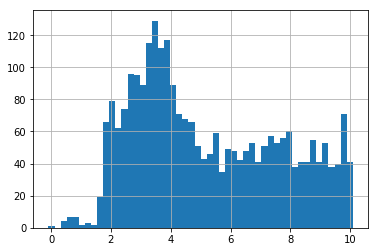

In [41]:
b.mean(1).hist(bins=50);

In [42]:
(b.mean(1)>9.75).sum() 

80

In [43]:
np.abs(b.median(1)-b.mean(1)).mean()

0.04428155482332637

In [44]:
b.mean(1).mean(),b.median(1).mean()

(5.238914127424172, 5.276893738604095)

In [45]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub208_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [46]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub208_a11.csv".format('median'))
p.to_csv(fname,index=None)